In [20]:
import io

import pandas as pd
import requests


In [21]:
# You might need this library to read Excel (or might not)
# !pip install xlrd
# !pip install sklearn

In [22]:
df_in=pd.read_excel('.\default of credit card clients.xls', header=1, index_col=0)

df = pd.DataFrame(data=df_in)


In [23]:
df.rename(columns={'default payment next month': 'target'})

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


Data is ready! 


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [25]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<Axes: ylabel='ID'>

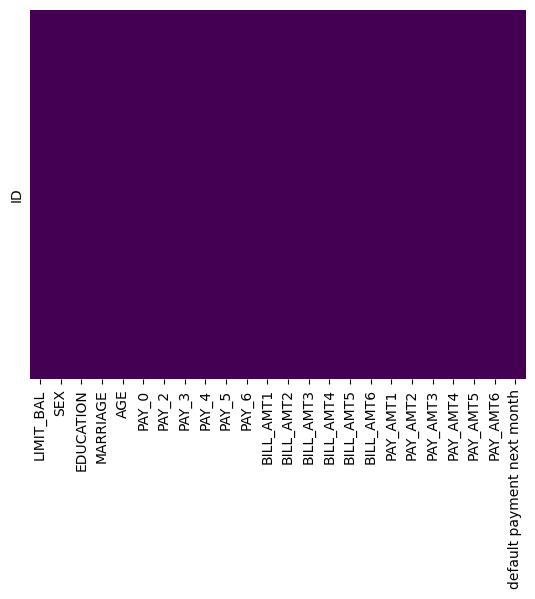

In [27]:
import seaborn as sns

# I will check for null values. It says on the website that we dont have, but just in case"
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<Axes: >

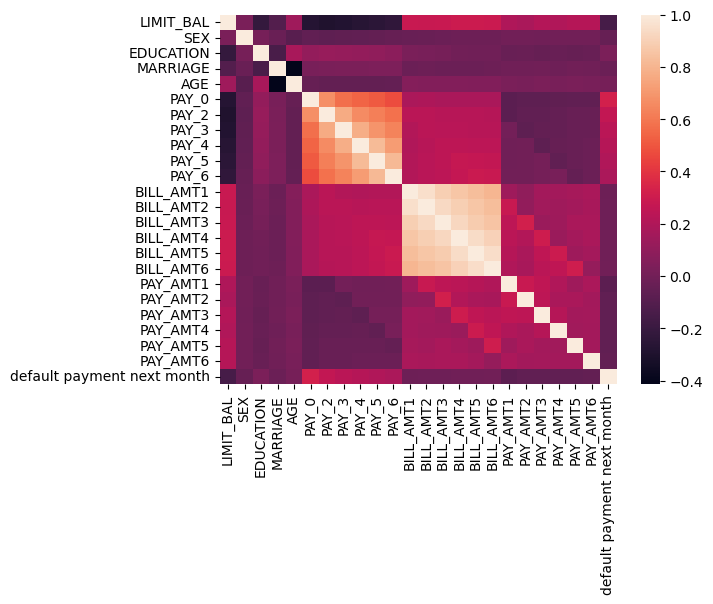

In [28]:
sns.heatmap(df.corr()) # See the correlation between the features

In [29]:
from sklearn.model_selection import train_test_split
features = list(df.columns[:-1]) # Take all the columns except the last one as input

train, test = train_test_split(df, test_size=0.3, random_state=101)

In [30]:
features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [31]:
len(features)

23

In [32]:
'''I am going to import some classifiers to train the data on'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:

classifiers = [LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]
# Save the classifiers in a list , with the default values
models = [classifier() for classifier in classifiers]

In [34]:
'''Train all the models in a loop and find the accuracy'''
for m in models:
    m.fit(train[features], train['default payment next month'])
    
for m in models:
    score = m.score(test[features], test['default payment next month'])
    print('Model                   Accuracy')
    print(f"{str(m)}  {score}")

c:\Users\vasil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model                   Accuracy
LogisticRegression()  0.7842222222222223
Model                   Accuracy
KNeighborsClassifier()  0.7496666666666667
Model                   Accuracy
DecisionTreeClassifier()  0.7275555555555555
Model                   Accuracy
RandomForestClassifier()  0.816


In [35]:
from sklearn.metrics import balanced_accuracy_score

for mod in models:
    pred = mod.predict(test[features])
    # print(pred, train['default payment next month'],len(pred))
    balanced_accuracy = balanced_accuracy_score(test['default payment next month'],pred)
    print(f"Balanced Accuracy: {str(mod)} \n {balanced_accuracy}")
    

Balanced Accuracy: LogisticRegression() 
 0.5003732498623295


Balanced Accuracy: KNeighborsClassifier() 
 0.5436602387339972
Balanced Accuracy: DecisionTreeClassifier() 
 0.6124242301320324
Balanced Accuracy: RandomForestClassifier() 
 0.6473522752045068


## Feature Selecting
Using scikit-learn I will remove the feature of the least importance, using feature engine. This happens by analizing the dependance of the performance to a feature. 
I am going to do that by using a boosting machine and the R2 to evaluate the feature subsets using 2-fold cross-validation

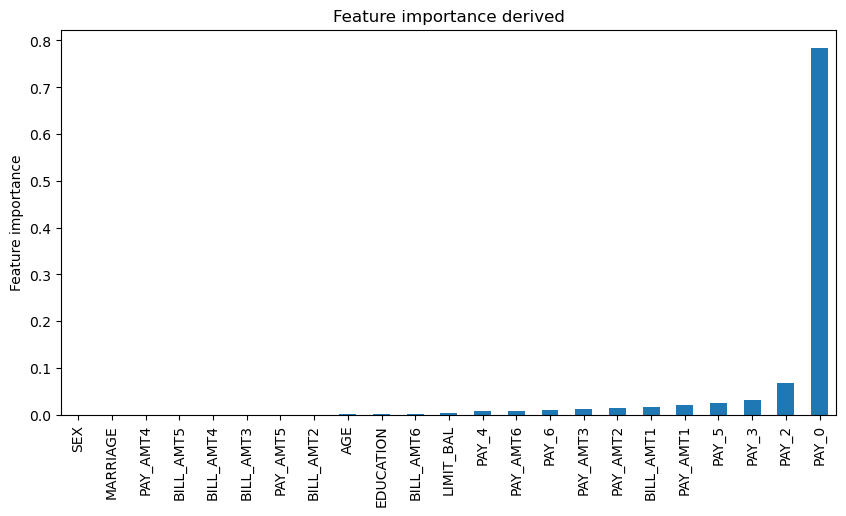

In [36]:
# !pip install feature_engine
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from feature_engine.selection import RecursiveFeatureElimination

# An algorithm for reducing bias
model = GradientBoostingRegressor(
    n_estimators=5,
    random_state=10,
)

rfe = RecursiveFeatureElimination(
    estimator = model, # the ML model
    scoring = 'r2', 
    threshold = 0.001, 
    cv=2,
)
rfe.fit(train[features],train['default payment next month'])

rfe.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived')
plt.show()

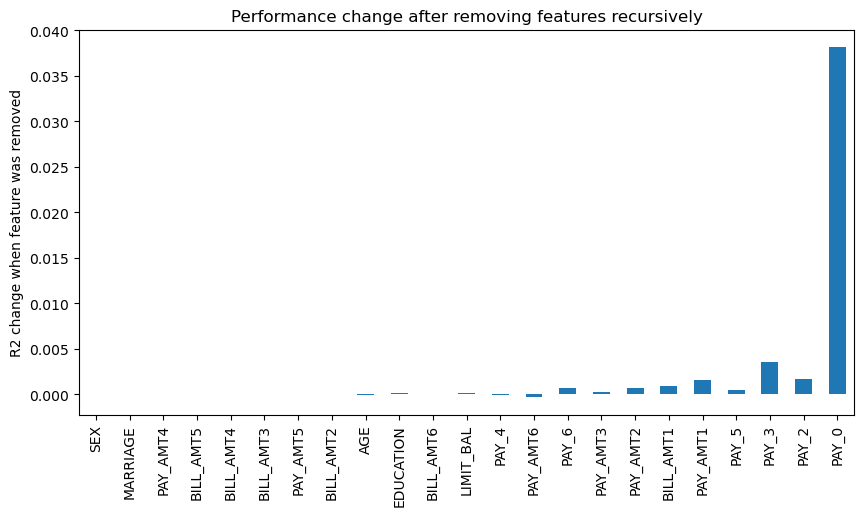

In [37]:
pd.Series(rfe.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('R2 change when feature was removed')
plt.show()

In [38]:
train_t = rfe.transform(train[features])
test_t = rfe.transform(test[features])

<large> Now I will tune the classifiers<large>

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In the randomforest the tree depth is important and with finding the best depth I can avoid overfitting

In [40]:
best = {}
v_list = []
for max_d in range(len(df['default payment next month'])):
    if max_d!=0 and max_d<=56: # MAX_D < 56 because I ran all the data and found that after 56 the performance doesn't change.
        random_forest = RandomForestClassifier(
            max_depth=max_d, 
            random_state=101,
            n_jobs=12
        )
        random_forest.fit(train_t, train['default payment next month'])
        
        maxim = random_forest.score(test_t, test['default payment next month'])
        best[f'{max_d}']=maxim # Save the values to a dictionary
        v_list.append(maxim) # Save the scores in a list

top_values = max(best, key=best.get)
print(f'The best value for max depth is :{top_values}')

rf = RandomForestClassifier(
            max_depth=int(top_values), 
            random_state=101,
            n_jobs=12
)
rf.fit(train_t, train['default payment next month'])

pred_rf = rf.predict(test_t)
# Calculate the accuracy
score = rf.score(test_t, test['default payment next month'])

print(f"{str(rf)} : {score}")
# Calculate the balanced accuracy
balanced_accuracies = balanced_accuracy_score(test['default payment next month'], pred_rf)
print(f'Balanced accuracy: {balanced_accuracies}')
# Create a confusion matrix
cm_rf = confusion_matrix(test['default payment next month'], pred_rf, labels=rf.classes_, normalize='true')
print()
print("Confusion matrix for", str(rf), ":")
print(cm_rf)


The best value for max depth is :2
RandomForestClassifier(max_depth=2, n_jobs=12, random_state=101) : 0.8271111111111111
Balanced accuracy: 0.64566506325841

Confusion matrix for RandomForestClassifier(max_depth=2, n_jobs=12, random_state=101) :
[[0.96486257 0.03513743]
 [0.67353244 0.32646756]]


[0.8153333333333334, 0.8271111111111111, 0.827, 0.8265555555555556, 0.8271111111111111, 0.827, 0.8265555555555556, 0.8267777777777777, 0.826, 0.8242222222222222, 0.8235555555555556, 0.8224444444444444, 0.8207777777777778, 0.82, 0.8187777777777778, 0.8166666666666667, 0.8135555555555556, 0.8113333333333334, 0.8088888888888889, 0.8071111111111111, 0.806, 0.8042222222222222, 0.8028888888888889, 0.8, 0.799, 0.7953333333333333, 0.7947777777777778, 0.7921111111111111, 0.7906666666666666, 0.7895555555555556, 0.7888888888888889, 0.7885555555555556, 0.7878888888888889, 0.7872222222222223, 0.7871111111111111, 0.7863333333333333, 0.7873333333333333, 0.7862222222222223, 0.7865555555555556, 0.7862222222222223, 0.7866666666666666, 0.7864444444444444, 0.786, 0.7865555555555556, 0.7865555555555556, 0.7864444444444444, 0.7862222222222223, 0.7862222222222223, 0.7863333333333333, 0.7862222222222223, 0.7863333333333333, 0.7862222222222223, 0.7862222222222223, 0.7861111111111111, 0.7862222222222223, 0.7861

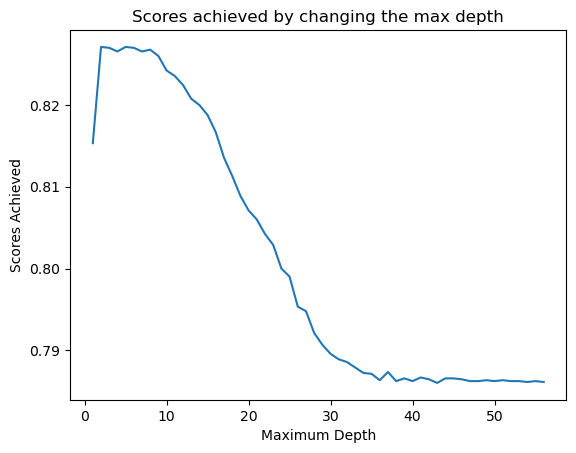

In [41]:
# A plot showing the correlation
plot = plt.plot(range(1,57),v_list)
plt.title('Scores achieved by changing the max depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Scores Achieved')
print(v_list)
plt.show()


# I will tune the Logistic Regression classifier 
I will try different solvers

In [42]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
v_lr = []
for s in solver:
  lr1 = LogisticRegression(
      random_state=101, 
      solver=s,  
      penalty='l2',  
      n_jobs=12,  
      max_iter=100,  # Max number of iterations for the MLE process
  )
  lr1.fit(train_t, train['default payment next month'])
  score = lr1.score(test_t, test['default payment next month'])
    
  v_lr.append(score)

c:\Users\vasil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Text(0, 0.5, 'LinearRegression Score')

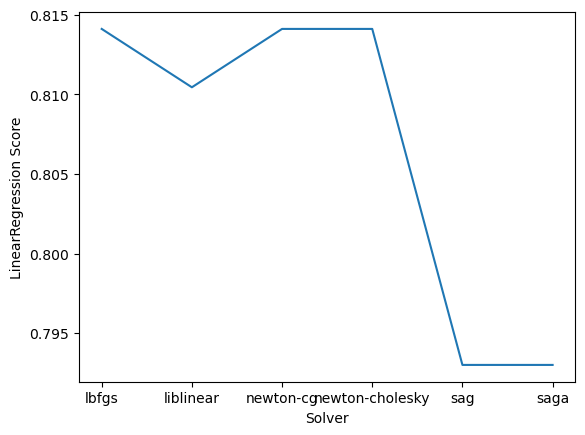

In [43]:
plt.plot(solver,v_lr)
plt.xlabel('Solver')
plt.ylabel('LinearRegression Score')

The 'newton-cg' and 'newton-cholesky' work best. I will use newton-cg

In [44]:
lr = LogisticRegression(
      random_state=101,  
      solver='newton-cg',  
      penalty='l2',  
      n_jobs=12,  
      max_iter=100,  
  )
lr.fit(train_t, train['default payment next month'])
score = lr.score(test_t, test['default payment next month'])
    
print(f"{str(lr)} : {score}")
pred_lr = lr.predict(test_t)
balanced_accuracies = balanced_accuracy_score(test['default payment next month'], pred_lr)
print(f'Balanced accuracy: {balanced_accuracies}')
cm_lr = confusion_matrix(test['default payment next month'], pred_rf, labels=lr.classes_,normalize='true')
print()
print(f"Confusion matrix for {str(lr)} :")
print(cm_lr)

LogisticRegression(n_jobs=12, random_state=101, solver='newton-cg') : 0.8141111111111111
Balanced accuracy: 0.5981853607260016

Confusion matrix for LogisticRegression(n_jobs=12, random_state=101, solver='newton-cg') :
[[0.96486257 0.03513743]
 [0.67353244 0.32646756]]


In [45]:
best_tree = {}
v_list_tree = []

for max_d in range(len(df['default payment next month'])):
    if max_d!=0 and max_d<=55: # MAX_D < 56 because I ran all the data and found that after 56 the performance doesn't change.
        d_tree = DecisionTreeClassifier(
            max_depth=max_d, 
        )
        d_tree.fit(train_t, train['default payment next month'])
        
        maxim = d_tree.score(test_t, test['default payment next month'])
        best_tree[f'{max_d}']=maxim # Save the values to a dictionary
        v_list_tree.append(maxim) # Save the scores in a list

top_values = max(best_tree, key=best_tree.get)
print(f'The best value for max depth is :{top_values}')

tree = DecisionTreeClassifier(
            max_depth=int(top_values), 
            
)
tree.fit(train_t, train['default payment next month'])

pred_tree = tree.predict(test_t)
# Calculate the accuracy
score = tree.score(test_t, test['default payment next month'])

print(f"{str(tree)} : {score}")
# Calculate the balanced accuracy
balanced_accuracies = balanced_accuracy_score(test['default payment next month'], pred_tree)
print(f'Balanced accuracy: {balanced_accuracies}')
# Create a confusion matrix
cm_tree = confusion_matrix(test['default payment next month'], pred_tree, labels=tree.classes_, normalize='true')
print()
print("Confusion matrix for", str(tree), ":")
print(cm_tree)

The best value for max depth is :3
DecisionTreeClassifier(max_depth=3) : 0.827
Balanced accuracy: 0.6446610970043999

Confusion matrix for DecisionTreeClassifier(max_depth=3) :
[[0.9654293  0.0345707 ]
 [0.67610711 0.32389289]]


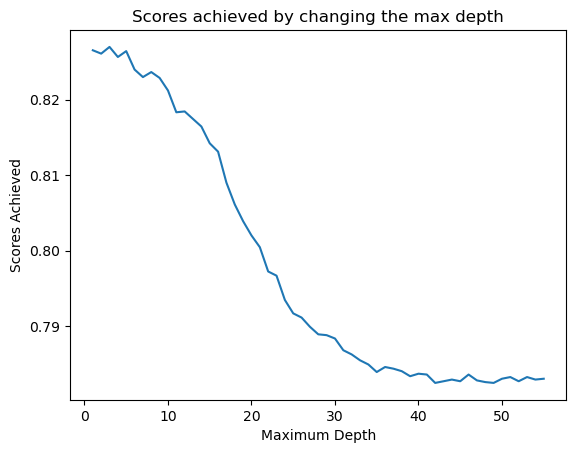

In [46]:
# A plot showing 
plot = plt.plot(range(1,56),v_list_tree)
plt.title('Scores achieved by changing the max depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Scores Achieved')
plt.show()

In [47]:
best_knn = {}
v_list_knn = []

for max_n in range(len(df['default payment next month'])):
    if max_n!=0 and max_n<=60: # MAX_D < 56 because I ran all the data and found that after 56 the performance doesn't change.
        d_knn = KNeighborsClassifier(
            n_neighbors=max_n, 
        )
        d_knn.fit(train_t, train['default payment next month'])
        
        maxim = d_knn.score(test_t, test['default payment next month'])
        best_knn[f'{max_n}']=maxim # Save the values to a dictionary
        v_list_knn.append(maxim) # Save the scores in a list

top_values = max(best_knn, key=best_knn.get)
print(f'The best value for max neighbors is :{top_values}')

knn = KNeighborsClassifier(
    n_neighbors=int(top_values), # How many closest neighbors we are using to predict each test sample!
)
knn.fit(train_t, train['default payment next month'])
score = knn.score(test_t, test['default payment next month'])
   
print(f"{str(knn)} : {score}")
pred_knn = knn.predict(test_t)
balanced_accuracies = balanced_accuracy_score(test['default payment next month'], pred_knn)
print(f'Balanced accuracy {balanced_accuracies}')
cm_knn = confusion_matrix(test['default payment next month'], pred_knn, labels=knn.classes_,normalize='true')
print()
print("Confusion matrix for", str(knn), ":")
print(cm_knn)

The best value for max neighbors is :21
KNeighborsClassifier(n_neighbors=21) : 0.8105555555555556
Balanced accuracy 0.6018904273813064

Confusion matrix for KNeighborsClassifier(n_neighbors=21) :
[[0.96897138 0.03102862]
 [0.76519053 0.23480947]]


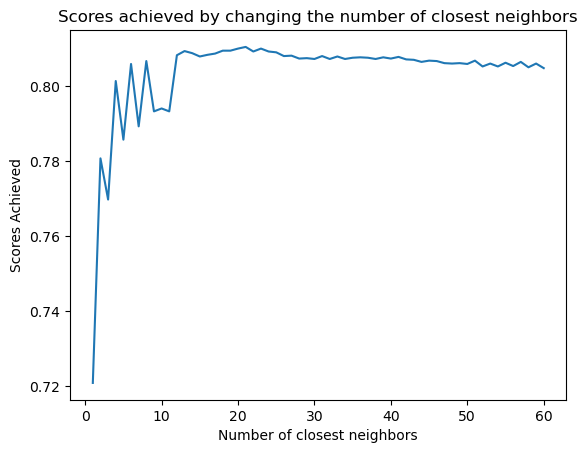

In [48]:
# A plot showing 
plot = plt.plot(range(1,61),v_list_knn)
plt.title('Scores achieved by changing the number of closest neighbors')
plt.xlabel('Number of closest neighbors')
plt.ylabel('Scores Achieved')
plt.show()

Confusion Matrix for  RandomForestClassifier(max_depth=2, n_jobs=12, random_state=101)


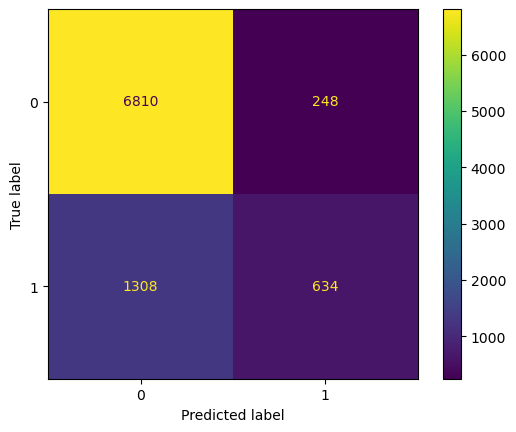

In [49]:
print("Confusion Matrix for ", str(rf))
ConfusionMatrixDisplay.from_estimator(
    rf,
    X=test_t,
    y=test['default payment next month'],
    labels=rf.classes_,
    cmap='viridis'
)

Confusion Matrix for  LogisticRegression(n_jobs=12, random_state=101, solver='newton-cg')


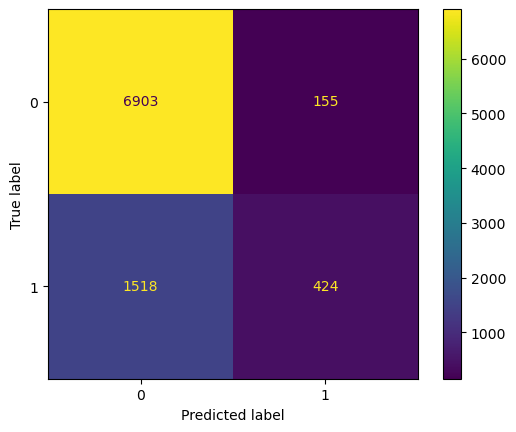

In [50]:
print("Confusion Matrix for ", str(lr))
ConfusionMatrixDisplay.from_estimator(
    lr,
    X=test_t,
    y=test['default payment next month'],
    labels=lr.classes_,
    cmap='viridis'
)

Confusion Matrix for  DecisionTreeClassifier(max_depth=3)


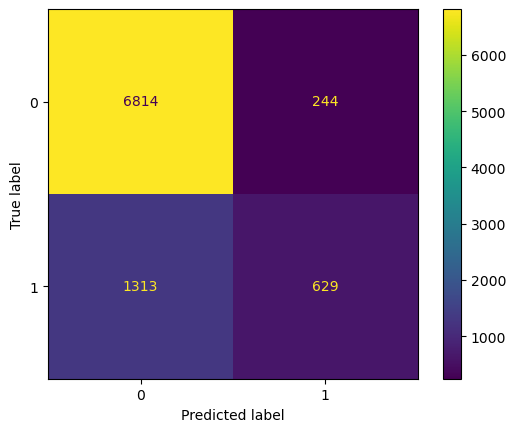

In [51]:
print("Confusion Matrix for ", str(tree))
ConfusionMatrixDisplay.from_estimator(
    tree,
    X=test_t,
    y=test['default payment next month'],
    labels=tree.classes_,
    cmap='viridis'
)

Confusion Matrix for  KNeighborsClassifier(n_neighbors=21)


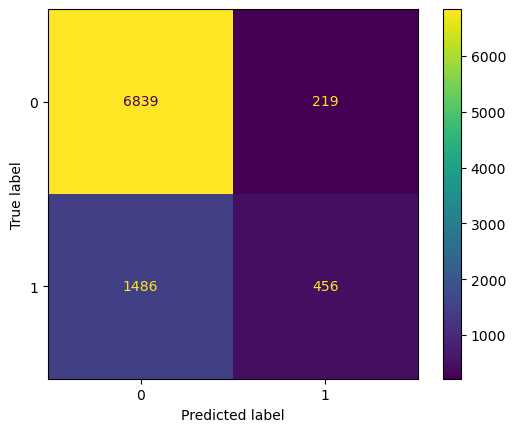

In [52]:
print("Confusion Matrix for ", str(knn))
ConfusionMatrixDisplay.from_estimator(
    knn,
    X=test_t,
    y=test['default payment next month'],
    labels=knn.classes_,
    cmap='viridis'
)

In [53]:
from sklearn.metrics import classification_report


In [54]:
all_pred = [pred_lr,pred_knn,pred_tree,pred_rf]
m_l = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
i = 0
for p in all_pred:
    
    print('***** Classification report for ', m_l[i], '***** ')
    print(classification_report(test['default payment next month'], p))
    i += 1

***** Classification report for  LogisticRegression ***** 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7058
           1       0.73      0.22      0.34      1942

    accuracy                           0.81      9000
   macro avg       0.78      0.60      0.61      9000
weighted avg       0.80      0.81      0.77      9000

***** Classification report for  KNeighborsClassifier ***** 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7058
           1       0.68      0.23      0.35      1942

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

***** Classification report for  DecisionTreeClassifier ***** 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7058
           1       0.72      0.32      0.45      1942


The classifiers struggle with predicting class 1. Probably because the data favour class 0

In [55]:
from sklearn.metrics import roc_auc_score
i = 0
for p in all_pred:
    # We will need the proabilities, so the X axis of the ROC curve can be calculated
   
    
    print('***** ROC Area Under the Curve for', str(m_l[i]), '***** ')
    print(roc_auc_score(y_true=list(test['default payment next month']), 
                        y_score=p, 
                        multi_class='ovr')
         )
    i += 1

***** ROC Area Under the Curve for LogisticRegression ***** 
0.5981853607260017
***** ROC Area Under the Curve for KNeighborsClassifier ***** 
0.6018904273813064
***** ROC Area Under the Curve for DecisionTreeClassifier ***** 
0.6446610970044
***** ROC Area Under the Curve for RandomForestClassifier ***** 
0.6456650632584101
